C:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10, Training Loss: 0.0525, Validation Loss: 0.0529
Epoch 2/10, Training Loss: 0.0393, Validation Loss: 0.0408
Epoch 3/10, Training Loss: 0.0321, Validation Loss: 0.0344
Epoch 4/10, Training Loss: 0.0280, Validation Loss: 0.0314
Epoch 5/10, Training Loss: 0.0252, Validation Loss: 0.0297
Epoch 6/10, Training Loss: 0.0227, Validation Loss: 0.0282
Epoch 7/10, Training Loss: 0.0210, Validation Loss: 0.0272
Epoch 8/10, Training Loss: 0.0197, Validation Loss: 0.0265
Epoch 9/10, Training Loss: 0.0186, Validation Loss: 0.0260
Epoch 10/10, Training Loss: 0.0178, Validation Loss: 0.0257
Training finished.


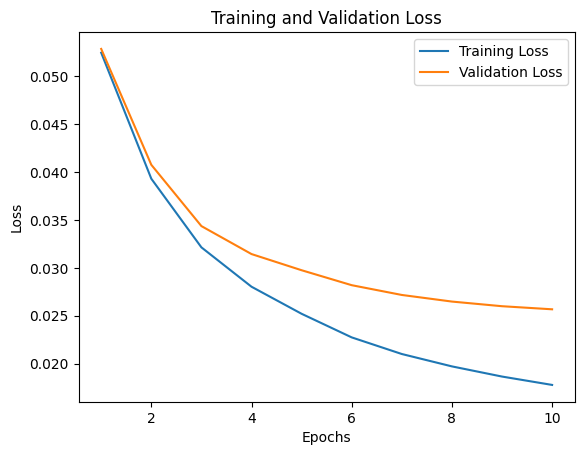

Confusion Matrix:
[[ 955    0    1    0    0   11    7    3    2    1]
 [   1 1111    3    1    1    0    3    0   15    0]
 [   8    9  947   14   13   10    8    8   13    2]
 [   3    5   18  893    0   48    4   10   14   15]
 [   2    3    2    0  923    6   10    3    0   33]
 [   7    2    3   21    4  825    9    1   15    5]
 [  16    4    2    1   11   11  904    0    9    0]
 [   3   14   20    2    7    1    0  941    2   38]
 [  15   11    7   18   14   25    9    6  847   22]
 [   8    6    0   10   35   10    1   15    7  917]]
Accuracy: 0.9263


In [13]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = np.where(X_train > 0, 1, 0).reshape(X_train.shape[0], -1)
X_test = np.where(X_test > 0, 1, 0).reshape(X_test.shape[0], -1)

encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-9))  # Add small epsilon to avoid log(0)

input_size = X_train.shape[1]
hidden_size = 64
output_size = 10

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, hidden_size)
b2 = np.zeros(hidden_size)
W3 = np.random.randn(hidden_size, hidden_size)
b3 = np.zeros(hidden_size)
W4 = np.random.randn(hidden_size, output_size)
b4 = np.zeros(output_size)

learning_rate = 0.01
epochs = 10
batch_size = 32
n_batches = X_train.shape[0] // batch_size

train_losses = []
val_losses = []

for epoch in range(epochs):
    for batch in range(n_batches):
        X_batch = X_train[batch * batch_size : (batch + 1) * batch_size]
        y_batch = y_train_encoded[batch * batch_size : (batch + 1) * batch_size]

        z1 = np.dot(X_batch, W1) + b1
        a1 = sigmoid(z1)

        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        z3 = np.dot(a2, W3) + b3
        a3 = sigmoid(z3)

        logits = np.dot(a3, W4) + b4
        y_pred = softmax(logits)

        loss = cross_entropy_loss(y_batch, y_pred)

        delta_out = y_pred - y_batch
        grad_W4 = np.dot(a3.T, delta_out)
        grad_b4 = np.sum(delta_out, axis=0)

        delta3 = np.dot(delta_out, W4.T) * a3 * (1 - a3)
        grad_W3 = np.dot(a2.T, delta3)
        grad_b3 = np.sum(delta3, axis=0)

        delta2 = np.dot(delta3, W3.T) * a2 * (1 - a2)
        grad_W2 = np.dot(a1.T, delta2)
        grad_b2 = np.sum(delta2, axis=0)

        delta1 = np.dot(delta2, W2.T) * a1 * (1 - a1)
        grad_W1 = np.dot(X_batch.T, delta1)
        grad_b1 = np.sum(delta1, axis=0)

        W1 -= learning_rate * grad_W1
        b1 -= learning_rate * grad_b1
        W2 -= learning_rate * grad_W2
        b2 -= learning_rate * grad_b2
        W3 -= learning_rate * grad_W3
        b3 -= learning_rate * grad_b3
        W4 -= learning_rate * grad_W4
        b4 -= learning_rate * grad_b4

    # Training loss
    z1_train = np.dot(X_train, W1) + b1
    a1_train = sigmoid(z1_train)
    z2_train = np.dot(a1_train, W2) + b2
    a2_train = sigmoid(z2_train)
    z3_train = np.dot(a2_train, W3) + b3
    a3_train = sigmoid(z3_train)
    logits_train = np.dot(a3_train, W4) + b4
    y_pred_train = softmax(logits_train)
    train_loss = cross_entropy_loss(y_train_encoded, y_pred_train)
    train_losses.append(train_loss)

    # Validation loss
    z1_val = np.dot(X_test, W1) + b1
    a1_val = sigmoid(z1_val)
    z2_val = np.dot(a1_val, W2) + b2
    a2_val = sigmoid(z2_val)
    z3_val = np.dot(a2_val, W3) + b3
    a3_val = sigmoid(z3_val)
    logits_val = np.dot(a3_val, W4) + b4
    y_pred_val = softmax(logits_val)
    val_loss = cross_entropy_loss(y_test_encoded, y_pred_val)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

print("Training finished.")

z1_test = np.dot(X_test, W1) + b1
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2) + b2
a2_test = sigmoid(z2_test)
z3_test = np.dot(a2_test, W3) + b3
a3_test = sigmoid(z3_test)
logits_test = np.dot(a3_test, W4) + b4

# Plot training and validation loss over epochs
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Confusion Matrix and Accuracy
y_pred_test = np.argmax(logits_test, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")

In [5]:
# after changing hyperparameter we get best result with this parameter
#learning_rate = 0.01
#epochs = 20
#batch_size = 32

In [14]:
def predict_digit(image, weights, biases):
    # Flatten the input image
    flattened_image = image.reshape(1, -1)

    # Perform forward pass
    z1 = np.dot(flattened_image, weights['W1']) + biases['b1']
    a1 = sigmoid(z1)
    z2 = np.dot(a1, weights['W2']) + biases['b2']
    a2 = sigmoid(z2)
    z3 = np.dot(a2, weights['W3']) + biases['b3']
    a3 = sigmoid(z3)
    logits = np.dot(a3, weights['W4']) + biases['b4']

    # Apply softmax
    probabilities = softmax(logits)

    # Get the predicted digit
    predicted_digit = np.argmax(probabilities)

    return predicted_digit



In [15]:
import numpy as np
import cv2

image = np.ones((280, 280), dtype=np.uint8) * 0
cv2.namedWindow('image')

def draw(event, x, y, flags, param):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(image, (x, y), 10, (255, 255, 255), -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

cv2.setMouseCallback('image', draw)

drawing = False

while True:
    cv2.imshow('image', image)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('c'):
        image[:, :] = 0
    elif key == ord('d'):
        resized_image = cv2.resize(image, (28, 28))
        normalized_image = resized_image / 255.0
        predicted_digit = predict_digit(normalized_image, {'W1': W1, 'W2': W2, 'W3': W3, 'W4': W4}, 
                                 {'b1': b1, 'b2': b2, 'b3': b3, 'b4': b4})
        print("Predicted Digit:", predicted_digit)

cv2.destroyAllWindows()

Predicted Digit: 2
Predicted Digit: 1
Predicted Digit: 3
Predicted Digit: 4
Predicted Digit: 6


Epoch 1/20


C:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8003 - loss: 0.7108 - val_accuracy: 0.9461 - val_loss: 0.1873
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9545 - loss: 0.1628 - val_accuracy: 0.9588 - val_loss: 0.1405
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9686 - loss: 0.1088 - val_accuracy: 0.9668 - val_loss: 0.1133
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9768 - loss: 0.0778 - val_accuracy: 0.9704 - val_loss: 0.0989
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9820 - loss: 0.0616 - val_accuracy: 0.9728 - val_loss: 0.0986
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9857 - loss: 0.0486 - val_accuracy: 0.9737 - val_loss: 0.0943
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9898 - loss: 0.0356 - val_accuracy: 0.9731 - val_loss: 0.0964
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9902 - loss: 0.0326 - val_accuracy: 0.9742 - val_

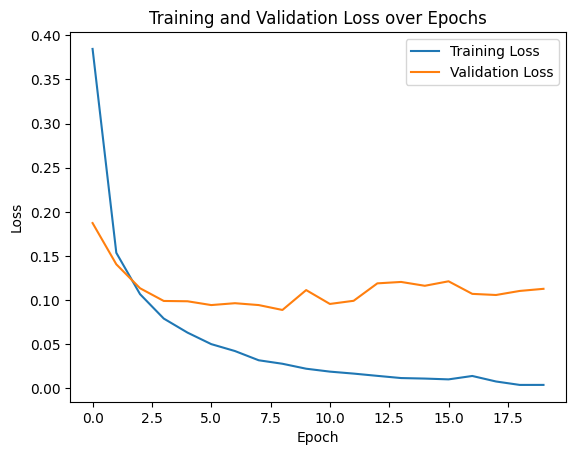

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.9762 - loss: 0.1105
Test Loss: 0.0986, Test Accuracy: 0.9788
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
Confusion Matrix:
[[ 971    0    2    3    2    0    1    0    1    0]
 [   0 1126    3    1    0    1    1    0    3    0]
 [   4    2 1014    2    1    0    2    1    6    0]
 [   0    0    4  989    0    4    0    2    7    4]
 [   2    1    3    0  962    0    3    3    2    6]
 [   2    0    0    9    1  874    4    0    2    0]
 [   5    4    0    1    1    6  941    0    0    0]
 [   3    7   11    4    1    0    0  988    7    7]
 [   1    1    4    3    2    5    1    2  952    3]
 [   5    4    1    7    8    9    0    3    4  968]]
Accuracy: 0.9785


In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

onehot_encoder = OneHotEncoder(sparse=False)
y_train_encoded = onehot_encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = onehot_encoder.transform(y_test.reshape(-1, 1))

num_epochs = 20
batch_size = 128
learning_rate = 0.001

model = Sequential([
    Dense(128, input_shape=(784,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='sigmoid')
])

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()

test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

y_pred = np.argmax(model.predict(X_test), axis=-1)

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

In [19]:
# after changing hyperparameter we get best result with this parameter
#num_epochs = 20
#batch_size = 128
#learning_rate = 0.001